<a href="https://colab.research.google.com/github/Prathamgupta19/pratham/blob/main/sih_aqi_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [114]:
data = pd.read_csv('/content/delhi_aqi[1].csv')

In [115]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [116]:
data.shape

(18776, 9)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [118]:
df = data.copy()

In [119]:
# Ensure you are consistently using 'data' as the DataFrame variable
data['datetime'] = pd.to_datetime(data['date'])
data['Date_1'] = data['datetime'].dt.date
data['Year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['Day'] = data['datetime'].dt.day
data['Weekday'] = data['datetime'].dt.day_name()   # Converting the 'date' column to datetime
data['hour'] = data['datetime'].dt.hour          # Extracting the hour

data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,datetime,Date_1,Year,month,Day,Weekday,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25 01:00:00,2020-11-25,2020,11,25,Wednesday,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25 02:00:00,2020-11-25,2020,11,25,Wednesday,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25 03:00:00,2020-11-25,2020,11,25,Wednesday,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25 04:00:00,2020-11-25,2020,11,25,Wednesday,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25 05:00:00,2020-11-25,2020,11,25,Wednesday,5


In [120]:
def season_creation(x):
    if x in [2,3,4]:
        season = "Spring"
    elif x in [5,6]:
        season = "Summer"
    elif x in [7,8]:
        season = "Monsoon"
    elif x in [9,10]:
        season = "Autumn"
    elif x in[11,12,1]:
        season = "Winter"
    return season


In [121]:
data["Season"] = data["month"].apply(season_creation)
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,datetime,Date_1,Year,month,Day,Weekday,hour,Season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25 01:00:00,2020-11-25,2020,11,25,Wednesday,1,Winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25 02:00:00,2020-11-25,2020,11,25,Wednesday,2,Winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25 03:00:00,2020-11-25,2020,11,25,Wednesday,3,Winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25 04:00:00,2020-11-25,2020,11,25,Wednesday,4,Winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25 05:00:00,2020-11-25,2020,11,25,Wednesday,5,Winter


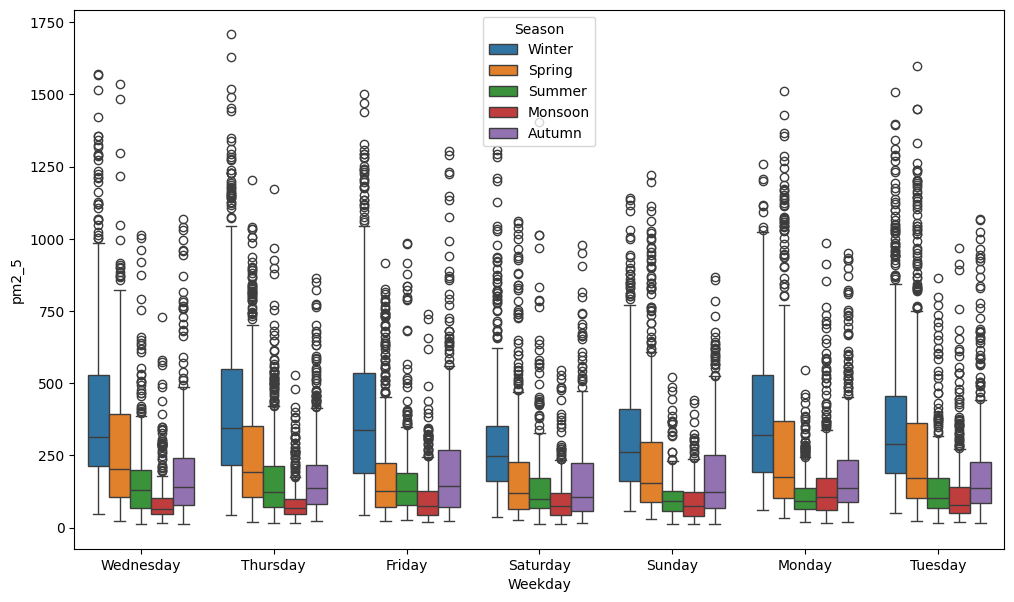

In [122]:
plt.figure(figsize = (12,7))
sns.boxplot(x = data['Weekday'], y = data['pm2_5'], hue = data['Season'])
plt.show()

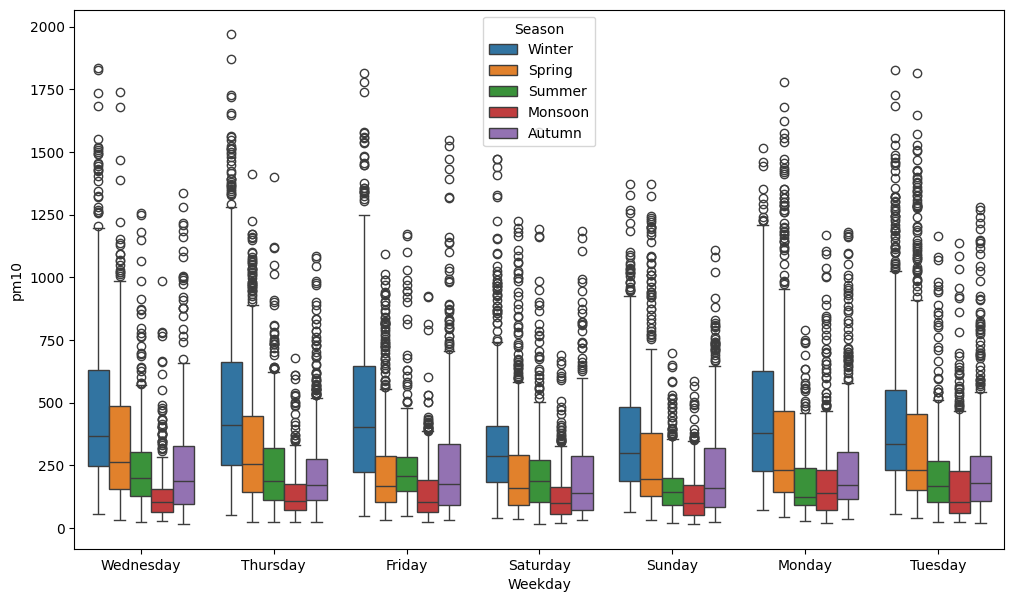

In [123]:
plt.figure(figsize = (12,7))
sns.boxplot(x = data['Weekday'], y = data['pm10'], hue = data['Season'])
plt.show()

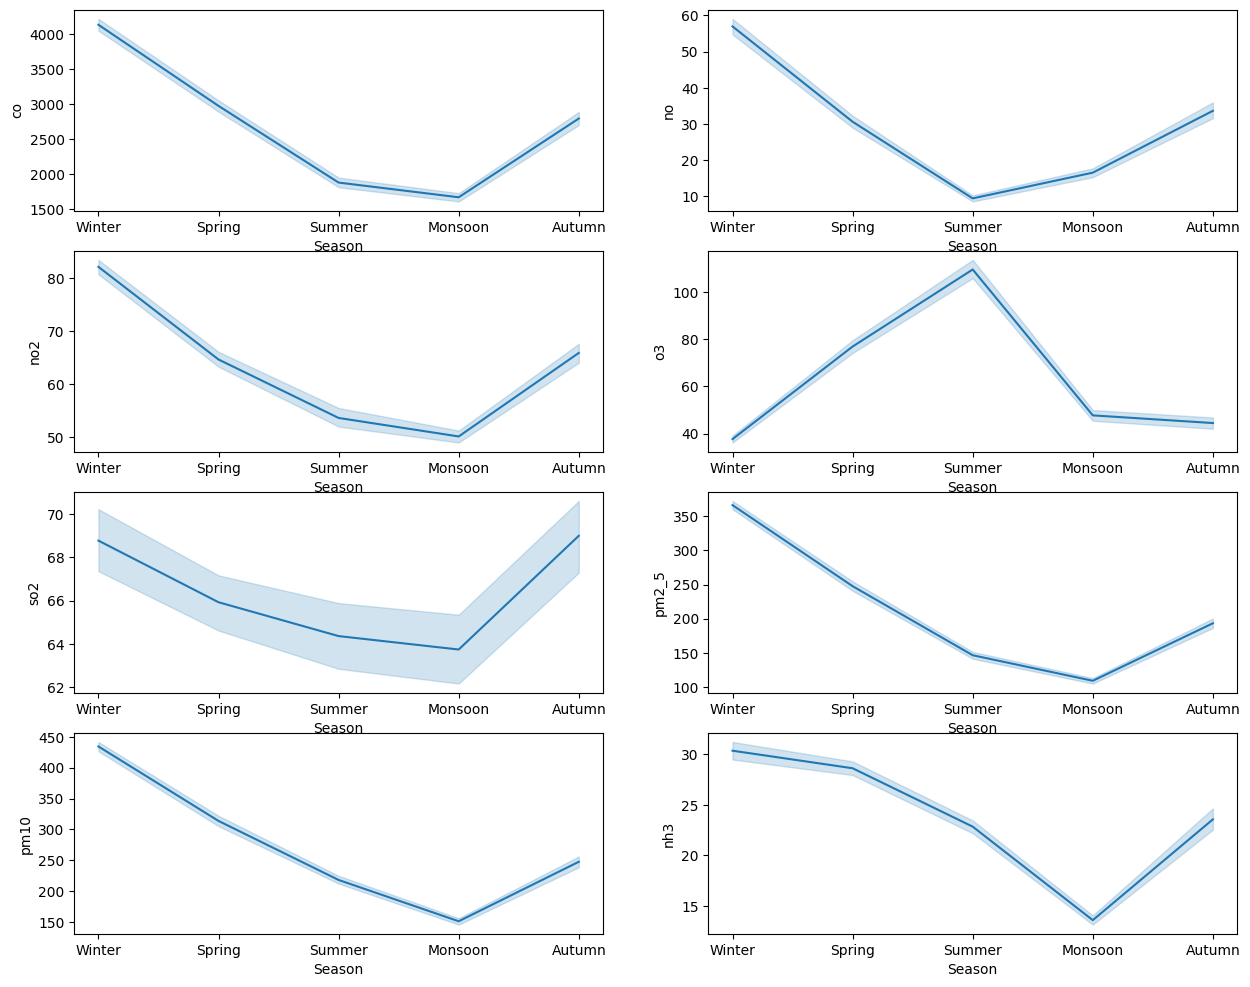

In [124]:
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x = data['Season'], y = data[i])
    plot = plot+1
plt.show()

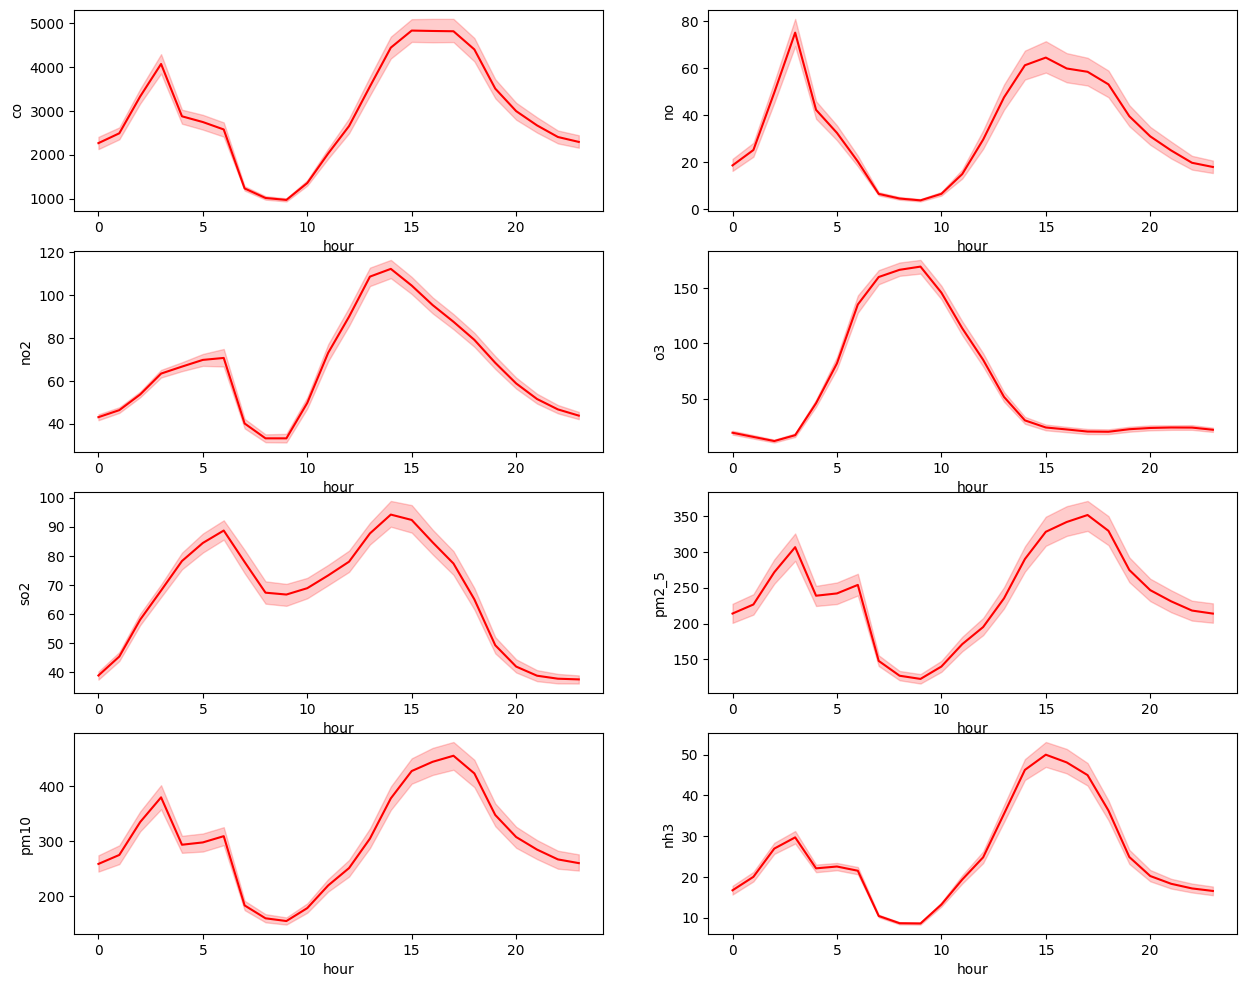

In [125]:
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x='hour', y = i, data = data, color = 'r')
    plot = plot+1
plt.show()

In [126]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,datetime,Date_1,Year,month,Day,Weekday,hour,Season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25 01:00:00,2020-11-25,2020,11,25,Wednesday,1,Winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25 02:00:00,2020-11-25,2020,11,25,Wednesday,2,Winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25 03:00:00,2020-11-25,2020,11,25,Wednesday,3,Winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25 04:00:00,2020-11-25,2020,11,25,Wednesday,4,Winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25 05:00:00,2020-11-25,2020,11,25,Wednesday,5,Winter


In [127]:
df_pred = data[['Date_1','pm2_5']]
df_pred.head()

,Date_1,pm2_5
0,2020-11-25,364.61
1,2020-11-25,420.96
2,2020-11-25,463.68
3,2020-11-25,454.81
4,2020-11-25,448.14


In [128]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date_1  18776 non-null  object 
 1   pm2_5   18776 non-null  float64
dtypes: float64(1), object(1)
memory usage: 293.5+ KB


In [129]:
df_pred['Date'] = pd.to_datetime(df_pred['Date_1'])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date_1  18776 non-null  object        
 1   pm2_5   18776 non-null  float64       
 2   Date    18776 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 440.2+ KB


In [130]:
df_pred = df_pred.groupby('Date')['pm2_5'].mean().reset_index()
df_pred.head()

,Date,pm2_5
0,2020-11-25,342.301739
1,2020-11-26,180.754167
2,2020-11-27,115.901667
3,2020-11-28,197.889167
4,2020-11-29,329.381667


In [131]:
df_pred1 = df_pred.copy()
df_pred1.set_index('Date', inplace=True)
print(df_pred1)
df_pred1.head(50)
df_pred1.tail()


                 pm2_5
Date                  
2020-11-25  342.301739
2020-11-26  180.754167
2020-11-27  115.901667
2020-11-28  197.889167
2020-11-29  329.381667
...                ...
2023-01-20  265.761667
2023-01-21  245.029583
2023-01-22  162.943333
2023-01-23  409.547083
2023-01-24  251.776667

[789 rows x 1 columns]


,pm2_5
Date,
2023-01-20,265.761667
2023-01-21,245.029583
2023-01-22,162.943333
2023-01-23,409.547083
2023-01-24,251.776667


In [132]:
df_pred1.describe()

,pm2_5
count,789.000000
mean,237.724729
std,180.529457
min,18.082917
25%,105.383750
50%,171.857083
75%,330.774167
max,1121.540833


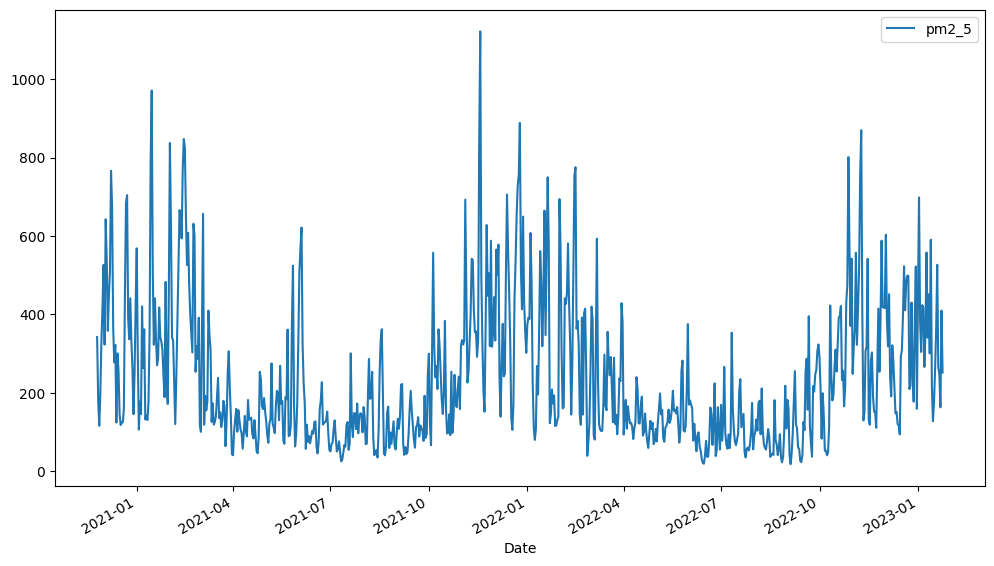

In [133]:
df_pred1.plot()
plt.show()

In [134]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_pred1)

array([0.19815922])

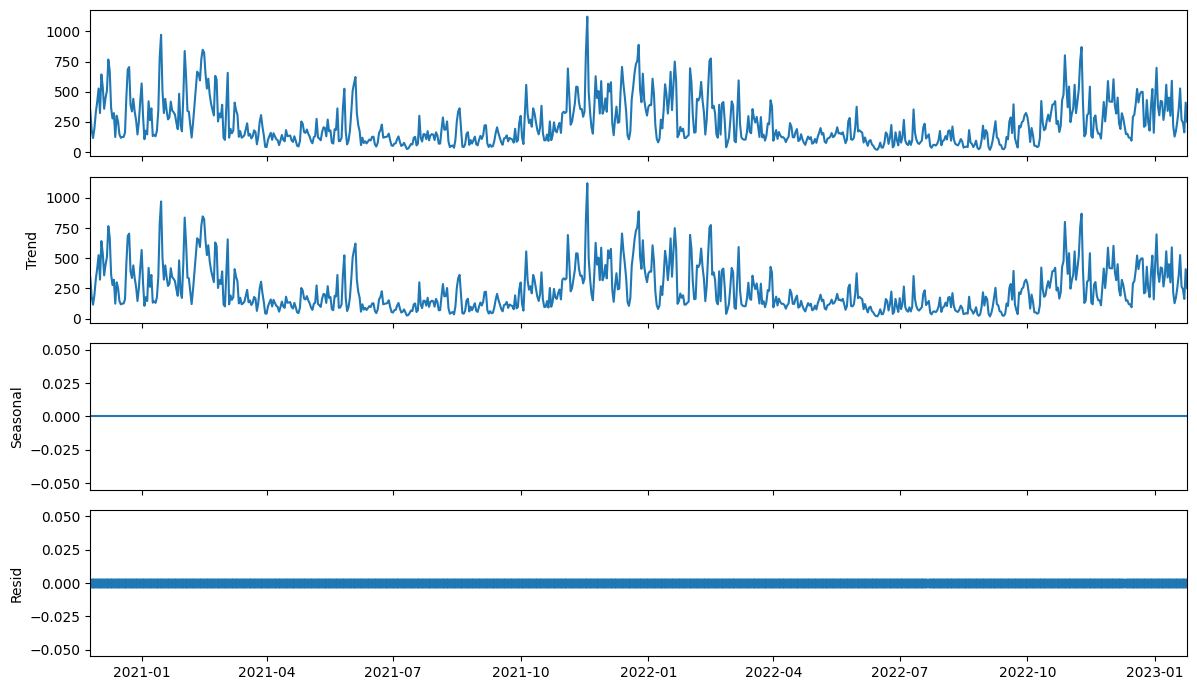

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition_additive = seasonal_decompose(df_pred1, model='additive', period=1)
decomposition_additive.plot()
plt.show()


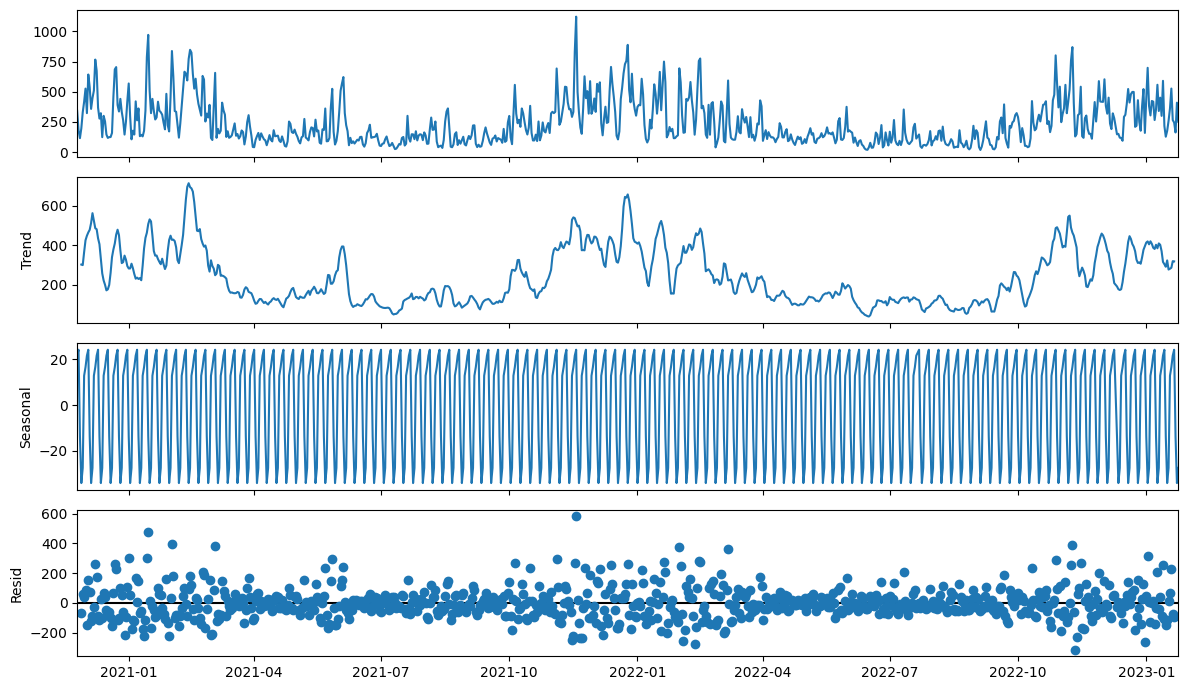

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition_additive = seasonal_decompose(df_pred1, model='additive', period=7)
decomposition_additive.plot()
plt.show()


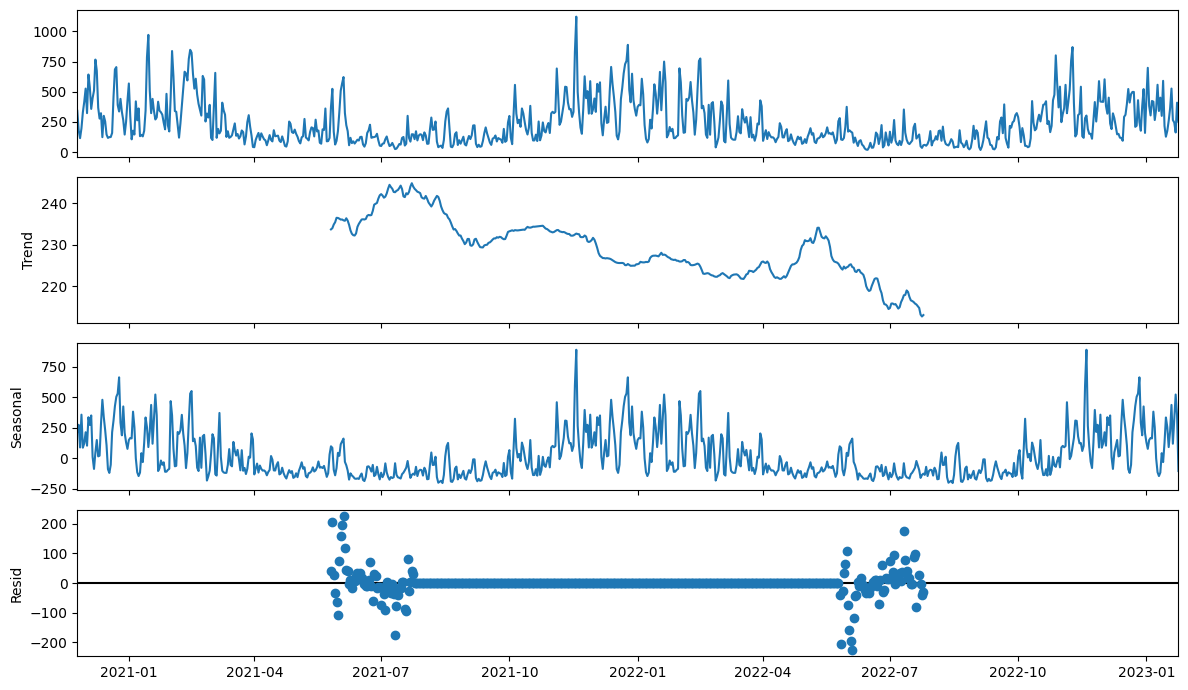

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition_additive = seasonal_decompose(df_pred1, model='additive', period=365)
decomposition_additive.plot()
plt.show()


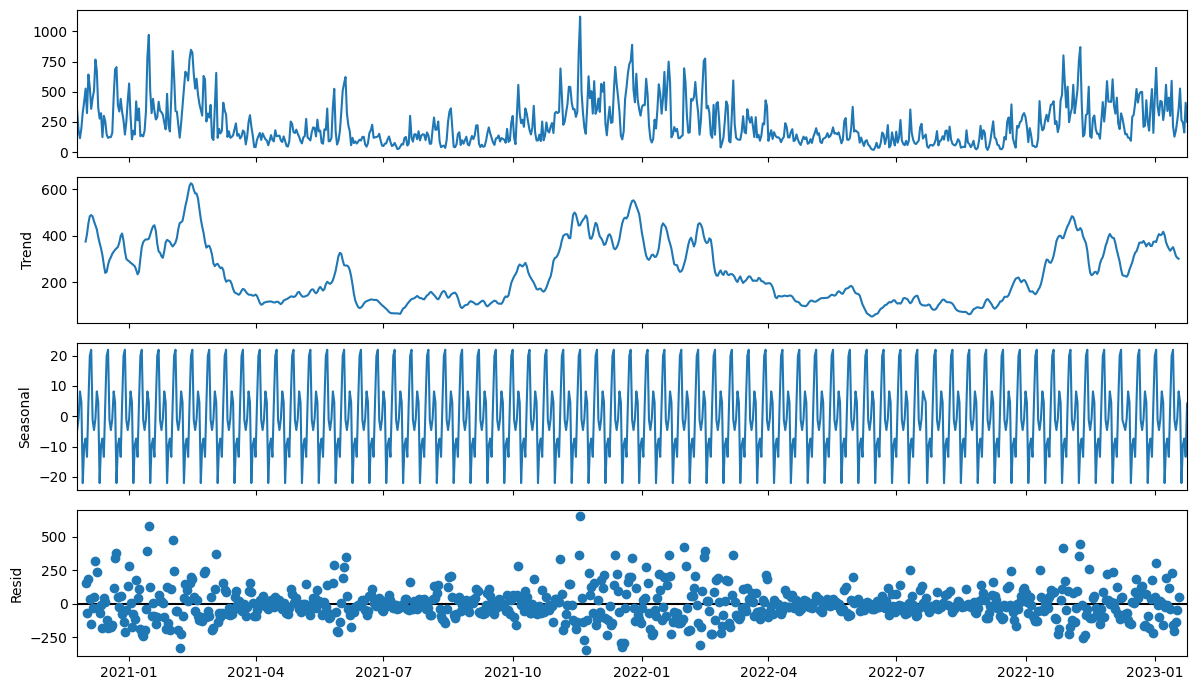

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose#breaks model into its components
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
decomposition_additive = seasonal_decompose(df_pred1, model = 'additive', period=12)# additive measn sum of trend seasonality and residual where residual means outliers
decomposition_additive.plot()
plt.show()

789    250.225066
790    296.665689
791    320.774132
792    316.294062
793    316.913286
794    318.884306
795    317.508652
796    315.212702
797    314.346759
798    314.212487
799    314.155722
800    314.199007
801    314.343458
802    314.461854
803    314.512268
804    314.525419
805    314.523836
806    314.514371
807    314.503575
808    314.496481
809    314.493487
810    314.492919
811    314.493470
812    314.494371
813    314.495134
814    314.495573
815    314.495734
816    314.495735
817    314.495669
818    314.495597
Name: predicted_mean, dtype: float64
                 pm2_5  Forecast_ARIMA  Forecast_SARIMA
Date                                                   
2020-11-25  342.301739        0.000000         0.000000
2020-11-26  180.754167      341.823579       341.773885
2020-11-27  115.901667      192.169401       179.561066
2020-11-28  197.889167      167.006124       117.101847
2020-11-29  329.381667      230.669742       198.719863
...                ...         

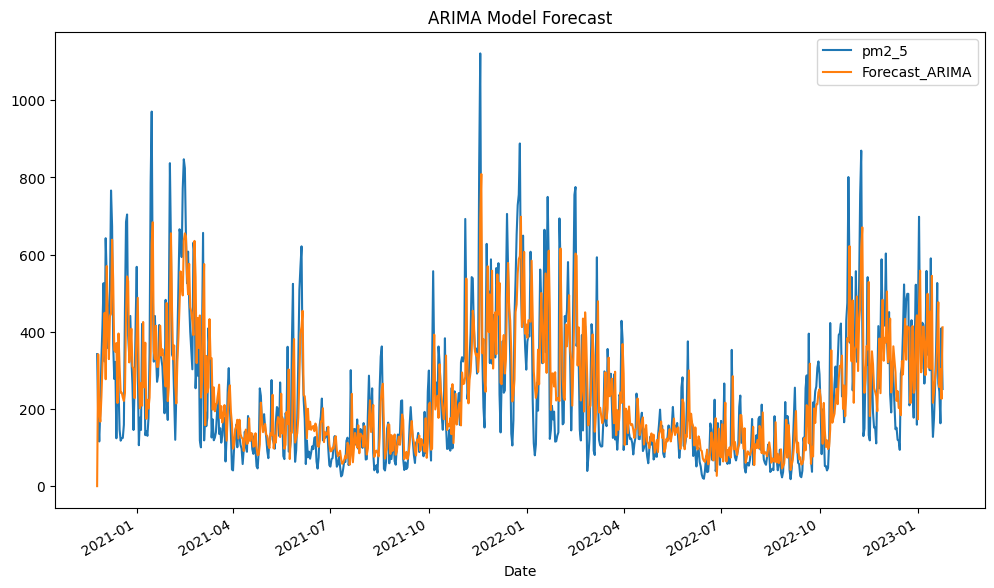

                               SARIMAX Results                                
Dep. Variable:                  pm2_5   No. Observations:                  789
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -4880.187
Date:                Fri, 30 Aug 2024   AIC                           9774.373
Time:                        12:10:06   BIC                           9807.060
Sample:                             0   HQIC                          9786.939
                                - 789                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6301      0.036     17.458      0.000       0.559       0.701
ar.L2         -0.2248      0.038     -5.989      0.000      -0.298      -0.151
ar.L3          0.0413      0.040      1.039      0.2

In [164]:
from statsmodels.tsa.arima.model import ARIMA
# Ensure df_pred1 is a DataFrame with only the 'pm2_5' column and Date as the index


# Define the ARIMA model
model_arima = ARIMA(df_pred1[['pm2_5']], order=(5,1,1))  # order=(p,d,q)
model_arima_fit = model_arima.fit()

# Forecast

forecast_arima = model_arima_fit.forecast(steps=30)  # Forecast for 30 days
df_pred1['Forecast_ARIMA'] = model_arima_fit.predict(start=0, end=len(df_pred1)-1)# historical data pe prediction
print(forecast_arima)
print(df_pred1)

# Get the dates for the forecasted period
forecast_dates = pd.date_range(start=df_pred1.index[-1], periods=30, freq='D')

# Create a DataFrame to display the dates and forecasted AQI values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_AQI': forecast_arima})

# Display the DataFrame
print(forecast_df)
# Plot the results
df_pred1[['pm2_5', 'Forecast_ARIMA']].plot()
plt.title('ARIMA Model Forecast')
plt.show()

# Print model performance
print(model_arima_fit.summary())


789    257.717679
790    314.499748
791    311.150917
792    271.329313
793    295.198853
794    290.764664
795    268.593889
796    259.454390
797    280.584752
798    283.833622
799    260.844411
800    292.408125
801    309.160912
802    306.891261
803    282.929144
804    281.829790
805    281.367799
806    290.294840
807    292.942123
808    263.418812
809    275.564285
810    274.670887
811    273.825064
812    287.462724
813    303.832501
814    307.915318
815    285.268236
816    280.807202
817    282.509348
818    290.069726
Name: predicted_mean, dtype: float64
---------------------------------------------
                 pm2_5  Forecast_ARIMA  Forecast_SARIMA
Date                                                   
2020-11-25  342.301739        0.000000         0.000000
2020-11-26  180.754167      341.823579       341.773885
2020-11-27  115.901667      192.169401       179.561066
2020-11-28  197.889167      167.006124       117.101847
2020-11-29  329.381667      230.669742   

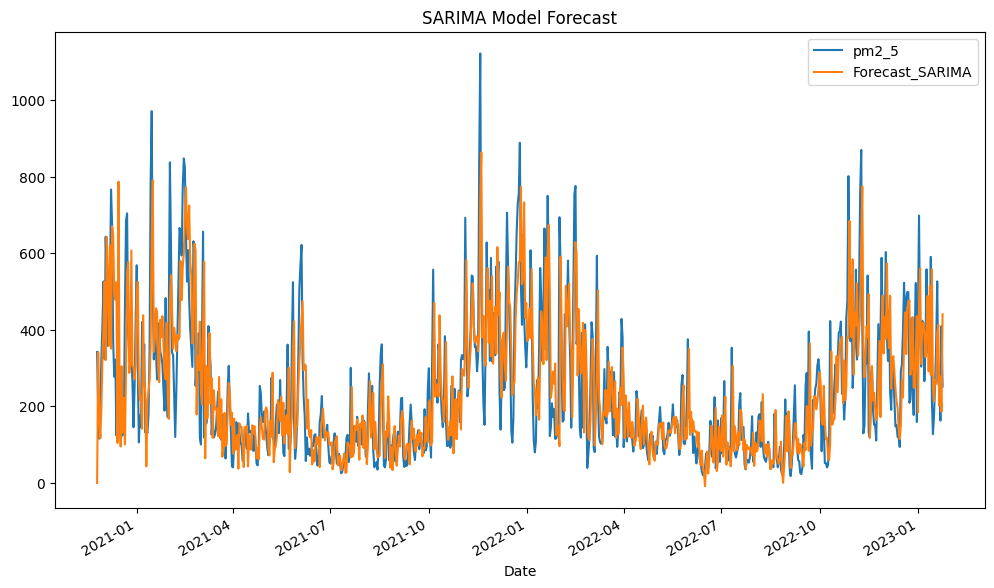

                                      SARIMAX Results                                       
Dep. Variable:                                pm2_5   No. Observations:                  789
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -4852.456
Date:                              Fri, 30 Aug 2024   AIC                           9720.912
Time:                                      12:14:15   BIC                           9758.145
Sample:                                           0   HQIC                          9735.235
                                              - 789                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1986      0.027     -7.270      0.000      -0.252      -0.145
ar.L2         -0.36

In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
model_sarima = SARIMAX(df_pred1['pm2_5'], order=(5,1,0), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()

# Forecast
forecast_sarima = model_sarima_fit.forecast(steps=30)
df_pred1['Forecast_SARIMA'] = model_sarima_fit.predict(start=0, end=len(df_pred1)-1)
print(forecast_sarima)
print('---------------------------------------------')
print(df_pred1)
print('------------------------------------------------------')
# Get the dates for the forecasted period
forecast_dates = pd.date_range(start=df_pred1.index[-1], periods=30, freq='D')

# Create a DataFrame to display the dates and forecasted AQI values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_AQI': forecast_arima})

# Display the DataFrame
print(forecast_df)
print('------------------------------------------------------')
# Plot the results
df_pred1[['pm2_5', 'Forecast_SARIMA']].plot()
plt.title('SARIMA Model Forecast')
plt.show()

# Print model performance
print(model_sarima_fit.summary())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8z5esbdm/1re6crof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8z5esbdm/b_935s_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64634', 'data', 'file=/tmp/tmp8z5esbdm/1re6crof.json', 'init=/tmp/tmp8z5esbdm/b_935s_h.json', 'output', 'file=/tmp/tmp8z5esbdm/prophet_modelh5pjbaro/prophet_model-20240830123104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-11-25  244.361317  239.907429  594.580081   244.361317   244.361317   
1   2020-11-26  244.318650  249.545720  589.543296   244.318650   244.318650   
2   2020-11-27  244.275982  211.948386  555.322578   244.275982   244.275982   
3   2020-11-28  244.233315  163.434296  514.391649   244.233315   244.233315   
4   2020-11-29  244.190648  182.265901  518.848212   244.190648   244.190648   
..         ...         ...         ...         ...          ...          ...   
814 2023-02-19  209.499934  212.624941  553.138768   209.499870   209.500017   
815 2023-02-20  209.457160  238.660234  585.873672   209.457091   209.457249   
816 2023-02-21  209.414386  230.922940  578.467988   209.414312   209.414480   
817 2023-02-22  209.371612  224.546126  570.628417   209.371534   209.371714   
818 2023-02-23  209.328838  205.694708  568.060044   209.328753   209.328945   

     additive_terms  additive_terms_low

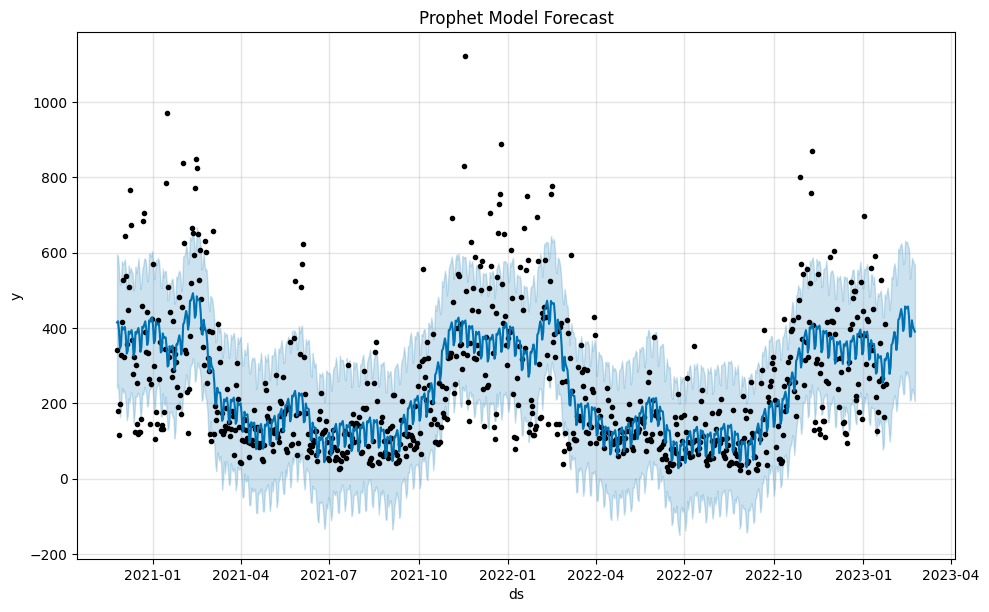

In [176]:
import prophet
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = df_pred[['Date', 'pm2_5']].rename(columns={'Date': 'ds', 'pm2_5': 'y'})

# Define and fit the model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Make future predictions
future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)
print(forecast_prophet)
print('--------------------------------')
print(future)

forecast_df = pd.DataFrame({'Date': future['ds'], 'Predicted_AQI': forecast_prophet['yhat']})
print(forecast_df)
print('--------------------------------')
# Plot the results
model_prophet.plot(forecast_prophet)
plt.title('Prophet Model Forecast')
plt.show()


In [178]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model
mae_arima = mean_absolute_error(df_pred1['pm2_5'], df_pred1['Forecast_ARIMA'])
mae_sarima = mean_absolute_error(df_pred1['pm2_5'], df_pred1['Forecast_SARIMA'])
mae_prophet = mean_absolute_error(df_prophet['y'], forecast_prophet['yhat'][:len(df_prophet)])
#mae_lstm = mean_absolute_error(test, test_predict)

# Print the MAE for each model
print(f'MAE ARIMA: {mae_arima}')
print(f'MAE SARIMA: {mae_sarima}')
print(f'MAE Prophet: {mae_prophet}')
#print(f'MAE LSTM: {mae_lstm}')


MAE ARIMA: 86.67181778798768
MAE SARIMA: 93.93099681439404
MAE Prophet: 97.85667941589581


In [140]:
import prophet

In [141]:
df_prophet = df_pred.rename(columns={'Date':'ds', 'pm2_5':'y'})                   # Renaming the column names according to Prophet's guidelines
df_prophet


,ds,y
0,2020-11-25,342.301739
1,2020-11-26,180.754167
2,2020-11-27,115.901667
3,2020-11-28,197.889167
4,2020-11-29,329.381667
...,...,...
784,2023-01-20,265.761667
785,2023-01-21,245.029583
786,2023-01-22,162.943333
787,2023-01-23,409.547083


In [142]:
from prophet import Prophet


In [143]:
m = Prophet()
model = m.fit(df_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8z5esbdm/dti2osw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8z5esbdm/r4j0cmis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28871', 'data', 'file=/tmp/tmp8z5esbdm/dti2osw4.json', 'init=/tmp/tmp8z5esbdm/r4j0cmis.json', 'output', 'file=/tmp/tmp8z5esbdm/prophet_modelkgta6mkn/prophet_model-20240830120309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [144]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [145]:
future_data = model.make_future_dataframe(periods = 180, freq='D')
#add 180 dates freq = daily

In [146]:
future_data

,ds
0,2020-11-25
1,2020-11-26
2,2020-11-27
3,2020-11-28
4,2020-11-29
...,...
964,2023-07-19
965,2023-07-20
966,2023-07-21
967,2023-07-22


In [147]:
df_prophet.shape

(789, 2)

In [148]:
future_data.shape

(969, 1)

In [149]:
prediction = model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-25,244.361317,243.829116,586.958933,244.361317,244.361317,169.922478,169.922478,169.922478,18.759862,18.759862,18.759862,151.162616,151.162616,151.162616,0.0,0.0,0.0,414.283794
1,2020-11-26,244.318650,244.954312,588.710461,244.318650,244.318650,173.448331,173.448331,173.448331,24.484167,24.484167,24.484167,148.964163,148.964163,148.964163,0.0,0.0,0.0,417.766980
2,2020-11-27,244.275982,214.628717,554.439044,244.275982,244.275982,149.055007,149.055007,149.055007,2.285823,2.285823,2.285823,146.769185,146.769185,146.769185,0.0,0.0,0.0,393.330990
3,2020-11-28,244.233315,171.000666,514.062390,244.233315,244.233315,101.537786,101.537786,101.537786,-43.050510,-43.050510,-43.050510,144.588296,144.588296,144.588296,0.0,0.0,0.0,345.771101
4,2020-11-29,244.190648,182.582525,522.622355,244.190648,244.190648,108.416723,108.416723,108.416723,-34.016657,-34.016657,-34.016657,142.433380,142.433380,142.433380,0.0,0.0,0.0,352.607370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2023-07-19,203.083829,-66.228054,275.064195,203.081798,203.085533,-90.559121,-90.559121,-90.559121,18.759862,18.759862,18.759862,-109.318983,-109.318983,-109.318983,0.0,0.0,0.0,112.524708
965,2023-07-20,203.041055,-35.735049,292.348064,203.039011,203.042777,-86.345170,-86.345170,-86.345170,24.484167,24.484167,24.484167,-110.829337,-110.829337,-110.829337,0.0,0.0,0.0,116.695886
966,2023-07-21,202.998281,-78.833919,260.438051,202.996219,203.000017,-110.150586,-110.150586,-110.150586,2.285823,2.285823,2.285823,-112.436409,-112.436409,-112.436409,0.0,0.0,0.0,92.847695
967,2023-07-22,202.955507,-131.355050,210.422687,202.953426,202.957249,-157.112414,-157.112414,-157.112414,-43.050510,-43.050510,-43.050510,-114.061904,-114.061904,-114.061904,0.0,0.0,0.0,45.843093


In [150]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [151]:
prediction[['ds','yhat_lower', 'yhat_upper', 'yhat']].tail(180)

,ds,yhat_lower,yhat_upper,yhat
789,2023-01-25,155.278272,489.033888,323.077427
790,2023-01-26,151.218666,503.895679,333.311254
791,2023-01-27,142.083076,478.695240,316.696092
792,2023-01-28,110.373465,447.162575,277.945434
793,2023-01-29,125.654143,468.715872,294.471683
...,...,...,...,...
964,2023-07-19,-66.228054,275.064195,112.524708
965,2023-07-20,-35.735049,292.348064,116.695886
966,2023-07-21,-78.833919,260.438051,92.847695
967,2023-07-22,-131.355050,210.422687,45.843093


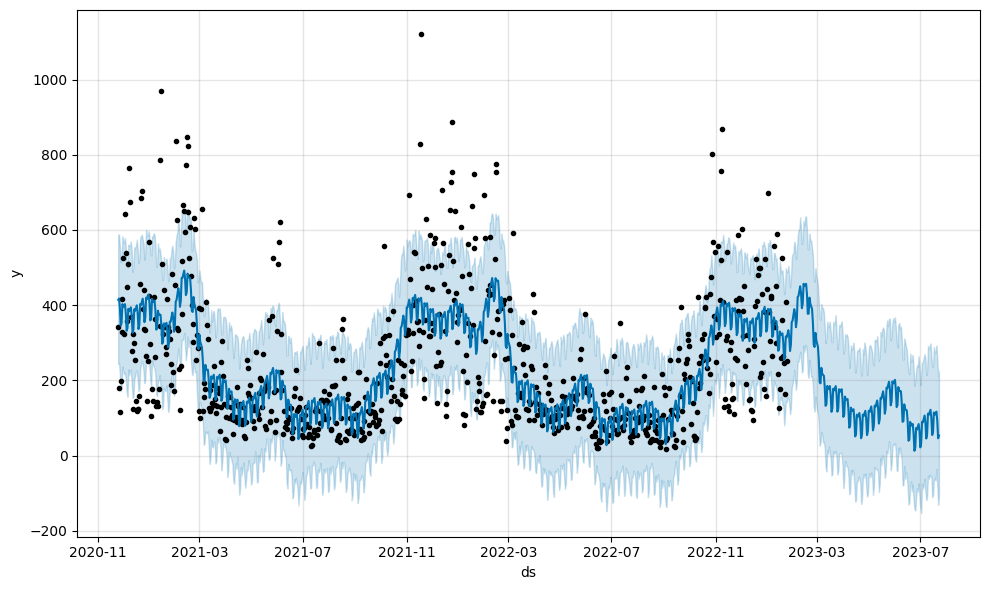

In [152]:
model.plot(prediction)
plt.show()

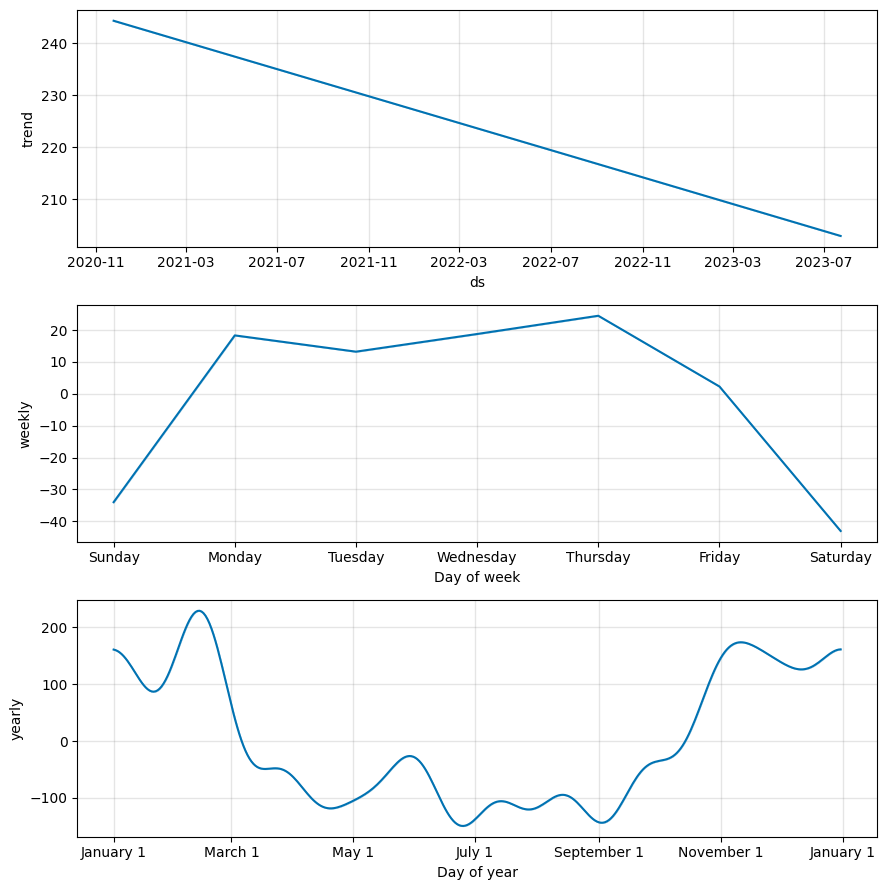

In [153]:
model.plot_components(prediction)
plt.show()

In [154]:
!pip install pmdarima
!pip install statsmodels


In [155]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [156]:
from statsmodels.tsa.stattools import adfuller
print(data)
result = adfuller(data['pm2_5'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

                      date       co     no     no2     o3     so2   pm2_5  \
0      2020-11-25 01:00:00  2616.88   2.18   70.60  13.59   38.62  364.61   
1      2020-11-25 02:00:00  3631.59  23.25   89.11   0.33   54.36  420.96   
2      2020-11-25 03:00:00  4539.49  52.75  100.08   1.11   68.67  463.68   
3      2020-11-25 04:00:00  4539.49  50.96  111.04   6.44   78.20  454.81   
4      2020-11-25 05:00:00  4379.27  42.92  117.90  17.17   87.74  448.14   
...                    ...      ...    ...     ...    ...     ...     ...   
18771  2023-01-24 04:00:00  1762.39   4.64   37.01  33.26   30.52  231.15   
18772  2023-01-24 05:00:00  1735.69   6.82   34.96  46.49   34.33  225.08   
18773  2023-01-24 06:00:00  1922.61   8.16   40.10  56.51   43.39  242.49   
18774  2023-01-24 07:00:00  1361.85   9.05   52.78  71.53  100.14  165.67   
18775  2023-01-24 08:00:00  1134.87   8.61   56.89  80.11  110.63  123.76   

         pm10    nh3            datetime      Date_1  Year  month  Day  \
0

In [157]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Apply differencing
df_diff = numeric_data.diff().dropna()

# Display the first few rows to check the output
df_diff.head()


,co,no,no2,o3,so2,pm2_5,pm10,nh3,Year,month,Day,hour
1,1014.71,21.07,18.51,-13.26,15.74,56.35,74.48,12.41,0.0,0.0,0.0,1.0
2,907.90,29.50,10.97,0.78,14.31,42.72,55.74,8.10,0.0,0.0,0.0,1.0
3,0.00,-1.79,10.96,5.33,9.53,-8.87,-7.95,-1.01,0.0,0.0,0.0,1.0
4,-160.22,-8.04,6.86,10.73,9.54,-6.67,-4.81,-1.52,0.0,0.0,0.0,1.0
5,-480.65,-14.53,0.00,22.88,13.35,-10.89,-17.40,-4.56,0.0,0.0,0.0,1.0
